In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 50)

## Lyme Disease Cases Data

In [2]:
# Opening csv of Lyme Disease cases reported 
# to Center for Disease Control and Prevention(CDC)
# https://www.cdc.gov/lyme/stats/survfaq.html

reported_cases_df = pd.read_csv('/Users/tcbon/Downloads/LD-Case-Counts-by-County-00-17.csv', encoding='latin-1')

In [3]:
reported_cases_df.head()

,Ctyname,Stname,STCODE,CTYCODE,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,Baldwin County,Alabama,1,3,1,0,1,0,0,0,0,0,0,1,0,1,1,0,3,1,2,2
2,Barbour County,Alabama,1,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Bibb County,Alabama,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Blount County,Alabama,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


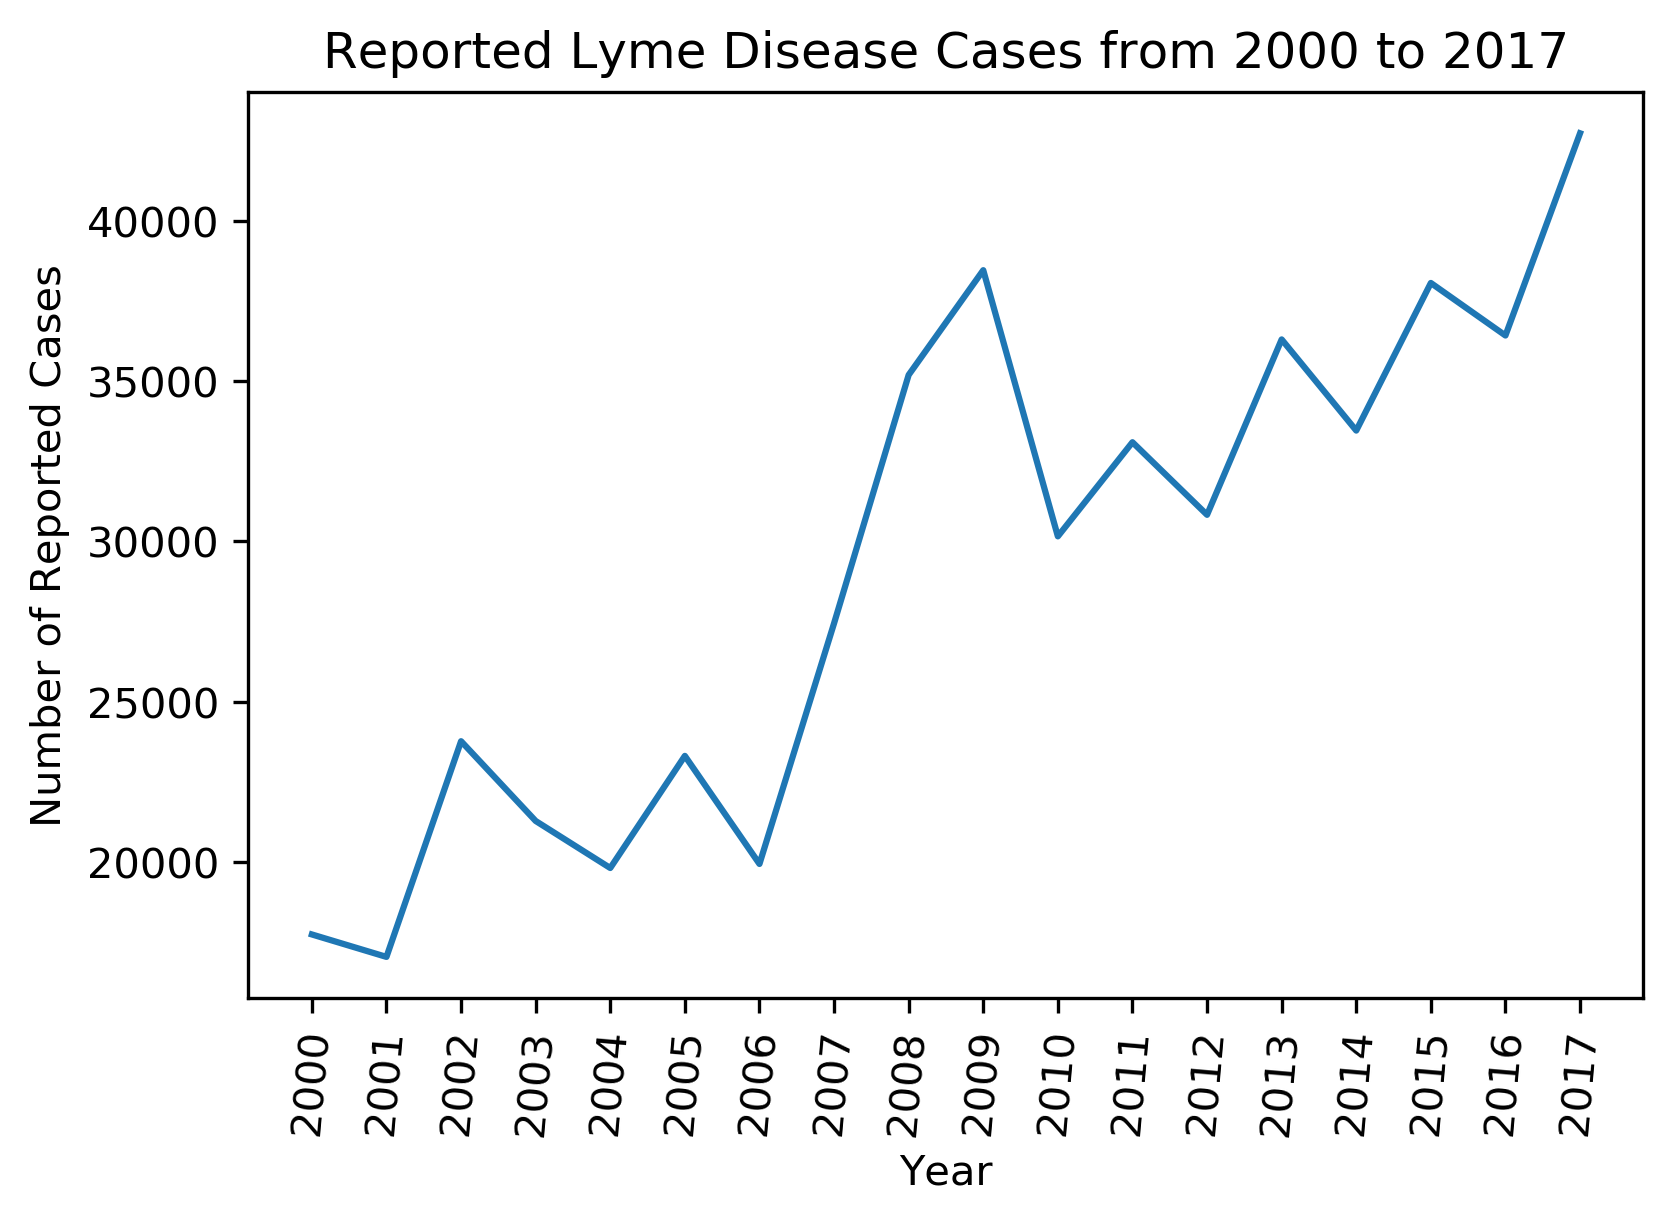

In [4]:
# Number of reported cases of Lyme Disease from 2000 to 2017
plt.figure(dpi=300)

year_list = [str(x) for x in range(2000,2018)]
plt.plot(reported_cases_df.sum()[4:])
plt.title('Reported Lyme Disease Cases from 2000 to 2017')
plt.xlabel('Year')
plt.xticks(range(18), year_list, rotation=85)
plt.ylabel('Number of Reported Cases');

In [5]:
# There is a very clear trend of increasing cases over time. 
# But since there is a, unusually large spike in 2009, it would make sense 
# to restrict the data to only 2010-2017 for consistency. Additionally,
# it is likely that data from many years ago may not be as representative
# of more recent times, so removing data before 2010 could possibly add 
# to the predictability of the model.

# Removing 2000- 2009 columns
reported_cases_df = reported_cases_df.drop(columns=['Cases2000','Cases2001','Cases2002','Cases2003',
                      'Cases2004','Cases2005','Cases2006','Cases2007',
                      'Cases2008','Cases2009'])

In [6]:
reported_cases_df.head()

,Ctyname,Stname,STCODE,CTYCODE,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,2,0
1,Baldwin County,Alabama,1,3,0,1,1,0,3,1,2,2
2,Barbour County,Alabama,1,5,0,1,0,0,0,0,0,0
3,Bibb County,Alabama,1,7,0,0,0,0,1,0,0,0
4,Blount County,Alabama,1,9,0,1,0,0,0,0,0,0


## County Population Data

In [7]:
# Opening csv for county population data from 2010 - 2017
# https://www.census.gov/data/datasets/2017/demo/popest/counties-total.html
# Definitions for columns -> https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2017/co-est2017-alldata.pdf

population_df = pd.read_csv('/Users/tcbon/Downloads/co-est2017-alldata.csv', encoding='latin-1')

In [8]:
population_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,...,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,40,3,6,1,0,Alabama,Alabama,4779736,4780135,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747,5444,13070,15297,13714,12377,10821,9687,14202,...,1.906349,1.613886,1.445311,1.232423,0.935078,0.938144,0.815424,0.848185,0.995780,0.963404,0.919336,-0.484337,0.001248,0.548871,-0.153915,-0.317205,-0.404473,0.788882,0.450741,0.939393,1.364296,0.694271,0.678575,0.558931,1.708218
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54750,55199,54927,54695,54864,54838,55278,55504,179,449,-272,-232,169,-26,440,226,...,1.150065,1.221491,2.924189,2.780235,0.000000,-0.272415,0.036489,0.237315,0.291699,0.272440,0.270802,5.911832,-5.829686,-4.086771,1.862010,-1.950739,4.831269,1.047102,5.911832,-6.102101,-4.050282,2.099325,-1.659040,5.103709,1.317904
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183110,186534,190048,194736,199064,202863,207509,212628,845,3424,3514,4688,4328,3799,4646,5119,...,1.152869,0.826021,1.301258,1.118683,0.936036,0.786017,0.800449,0.716100,0.855877,0.823643,0.780698,15.349904,16.410768,21.814836,19.664804,17.047872,20.493601,22.383175,16.285940,17.196786,22.615285,20.380904,17.903749,21.317244,23.163873
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27332,27351,27175,26947,26749,26264,25774,25270,-125,19,-176,-228,-198,-485,-490,-504,...,-1.825089,-2.150416,0.115300,-0.626910,-0.146298,-0.403477,-0.369535,-0.335221,-0.188633,-0.192167,-0.117546,0.402319,-6.418956,-7.649385,-5.214541,-16.222436,-18.755525,-19.042395,0.256021,-6.822433,-8.018920,-5.549762,-16.411069,-18.947692,-19.159940
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22872,22745,22658,22503,22533,22561,22633,22668,-47,-127,-87,-155,30,28,72,35,...,0.266454,-0.443518,3.673054,1.633518,0.438433,0.616699,0.620004,0.754952,0.887036,0.885073,0.882983,-5.480413,-4.713345,-6.510042,0.488498,0.931388,-1.416117,-0.882983,-5.041980,-4.096646,-5.890038,1.243450,1.818424,-0.531044,0.000000


## Merging DataFrames

In [9]:
# Merging population dataframe(population_df) with 
# lyme disease cases dataframe(reported_cases_df)

reported_cases_with_population_df = reported_cases_df.merge(population_df, 
                                                            left_on=['Stname','Ctyname'],
                                                            right_on=['STNAME','CTYNAME'])

In [10]:
reported_cases_with_population_df.head()

,Ctyname,Stname,STCODE,CTYCODE,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,...,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,2,0,50,3,6,1,1,Alabama,Autauga County,54571,54571,54750,55199,54927,54695,...,1.150065,1.221491,2.924189,2.780235,0.000000,-0.272415,0.036489,0.237315,0.291699,0.272440,0.270802,5.911832,-5.829686,-4.086771,1.862010,-1.950739,4.831269,1.047102,5.911832,-6.102101,-4.050282,2.099325,-1.659040,5.103709,1.317904
1,Baldwin County,Alabama,1,3,0,1,1,0,3,1,2,2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183110,186534,190048,194736,...,1.152869,0.826021,1.301258,1.118683,0.936036,0.786017,0.800449,0.716100,0.855877,0.823643,0.780698,15.349904,16.410768,21.814836,19.664804,17.047872,20.493601,22.383175,16.285940,17.196786,22.615285,20.380904,17.903749,21.317244,23.163873
2,Barbour County,Alabama,1,5,0,1,0,0,0,0,0,0,50,3,6,1,5,Alabama,Barbour County,27457,27457,27332,27351,27175,26947,...,-1.825089,-2.150416,0.115300,-0.626910,-0.146298,-0.403477,-0.369535,-0.335221,-0.188633,-0.192167,-0.117546,0.402319,-6.418956,-7.649385,-5.214541,-16.222436,-18.755525,-19.042395,0.256021,-6.822433,-8.018920,-5.549762,-16.411069,-18.947692,-19.159940
3,Bibb County,Alabama,1,7,0,0,0,0,1,0,0,0,50,3,6,1,7,Alabama,Bibb County,22915,22919,22872,22745,22658,22503,...,0.266454,-0.443518,3.673054,1.633518,0.438433,0.616699,0.620004,0.754952,0.887036,0.885073,0.882983,-5.480413,-4.713345,-6.510042,0.488498,0.931388,-1.416117,-0.882983,-5.041980,-4.096646,-5.890038,1.243450,1.818424,-0.531044,0.000000
4,Blount County,Alabama,1,9,0,1,0,0,0,0,0,0,50,3,6,1,9,Alabama,Blount County,57322,57324,57381,57562,57595,57623,...,0.555705,1.407032,0.225789,0.553753,-0.226199,0.364719,0.624902,0.955118,1.024875,1.076838,1.072896,0.469798,-1.719392,-1.110938,-2.726428,-1.563369,-1.736835,6.212416,0.243599,-1.354672,-0.486035,-1.771310,-0.538494,-0.659997,7.285313


## Creating Target Variable for Modeling

In [11]:
# Creating new columns for yearly incidence rate(number of cases/total population)
# This is a more meaningful metric because it controls for population. Obviously, 
# counties with higher population will tend to have more Lyme disease cases. 
# Now, we can compare the rates of disease between counties.

for i in range(8):
    reported_cases_with_population_df['201{}_incid_rate'.format(i)] = (reported_cases_with_population_df['Cases201{}'.format(i)] / reported_cases_with_population_df['POPESTIMATE201{}'.format(i)])

In [12]:
# Removing all unnecessary columns
target = reported_cases_with_population_df.loc[:, ['STCODE', 'CTYCODE','STNAME', 'CTYNAME', '2010_incid_rate', 
                                                   '2011_incid_rate', '2012_incid_rate', '2013_incid_rate',
                                                   '2014_incid_rate', '2015_incid_rate','2016_incid_rate', 
                                                   '2017_incid_rate']]

In [13]:
target.head()

,STCODE,CTYCODE,STNAME,CTYNAME,2010_incid_rate,2011_incid_rate,2012_incid_rate,2013_incid_rate,2014_incid_rate,2015_incid_rate,2016_incid_rate,2017_incid_rate
0,1,1,Alabama,Autauga County,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000036,0.000000
1,1,3,Alabama,Baldwin County,0.0,0.000005,0.000005,0.0,0.000015,0.000005,0.000010,0.000009
2,1,5,Alabama,Barbour County,0.0,0.000037,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,1,7,Alabama,Bibb County,0.0,0.000000,0.000000,0.0,0.000044,0.000000,0.000000,0.000000
4,1,9,Alabama,Blount County,0.0,0.000017,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [14]:
# Rotating year columns to become rows
# This will prepare target to be merged with features.

target = pd.melt(target,
                 id_vars=['STNAME','CTYNAME'],
                 value_vars=['2010_incid_rate','2011_incid_rate',
                             '2012_incid_rate','2013_incid_rate',
                             '2014_incid_rate', '2015_incid_rate',
                             '2016_incid_rate','2017_incid_rate'],
                 var_name='year',
                 value_name='incidence_rate')

In [15]:
target.head()

,STNAME,CTYNAME,year,incidence_rate
0,Alabama,Autauga County,2010_incid_rate,0.0
1,Alabama,Baldwin County,2010_incid_rate,0.0
2,Alabama,Barbour County,2010_incid_rate,0.0
3,Alabama,Bibb County,2010_incid_rate,0.0
4,Alabama,Blount County,2010_incid_rate,0.0


In [16]:
# Relabeling year column values with integer values
years= [x for x in range(8)]
for year in years:
    target.year[target.year == '201{}_incid_rate'.format(year)] = 2010 + year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
target.head()

,STNAME,CTYNAME,year,incidence_rate
0,Alabama,Autauga County,2010,0.0
1,Alabama,Baldwin County,2010,0.0
2,Alabama,Barbour County,2010,0.0
3,Alabama,Bibb County,2010,0.0
4,Alabama,Blount County,2010,0.0


In [18]:
redo_pickle = False

if redo_pickle:
    with open('target_variable.pickle','wb') as f:
        pickle.dump(target,f)
if not redo_pickle:
    with open('target_variable.pickle','rb') as f:
        target = pickle.load(f)